<a href="https://colab.research.google.com/github/m3sibti/DL_projects/blob/master/Keras_ResNet_mw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ResNet

## Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

## Prepare Cifar10 dataset

In [23]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train.shape, x_test.shape, np.max(x_train), np.min(x_train), x_train.dtype

((50000, 32, 32, 3), (10000, 32, 32, 3), 255, 0, dtype('uint8'))

Normalize the dataset

In [24]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
np.max(x_train), np.min(x_train), x_train.dtype

(1.0, 0.0, dtype('float32'))

In [25]:
y_train.shape

(50000, 1)

In [26]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_train.shape

(50000, 10)

Convert to `DatasetObject`

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

Load Using Batch

In [0]:
train_ds = train_ds.cache().batch(32).prefetch(buffer_size=16)
test_ds = test_ds.cache().batch(32).prefetch(buffer_size=16)

## Create ResNet Model

Using Functional API

In [0]:
inputs = keras.Input(shape=(32, 32, 3), name='image')

x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block2_output = layers.add([x, block1_output])

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block3_output = layers.add([x, block2_output])

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(10)(x)

In [0]:
resnet_model = models.Model(inputs, outputs)

In [34]:
resnet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 30, 30, 32)   896         image[0][0]                      
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 28, 28, 64)   18496       conv2d_7[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_8[0][0]                   
____________________________________________________________________________________________

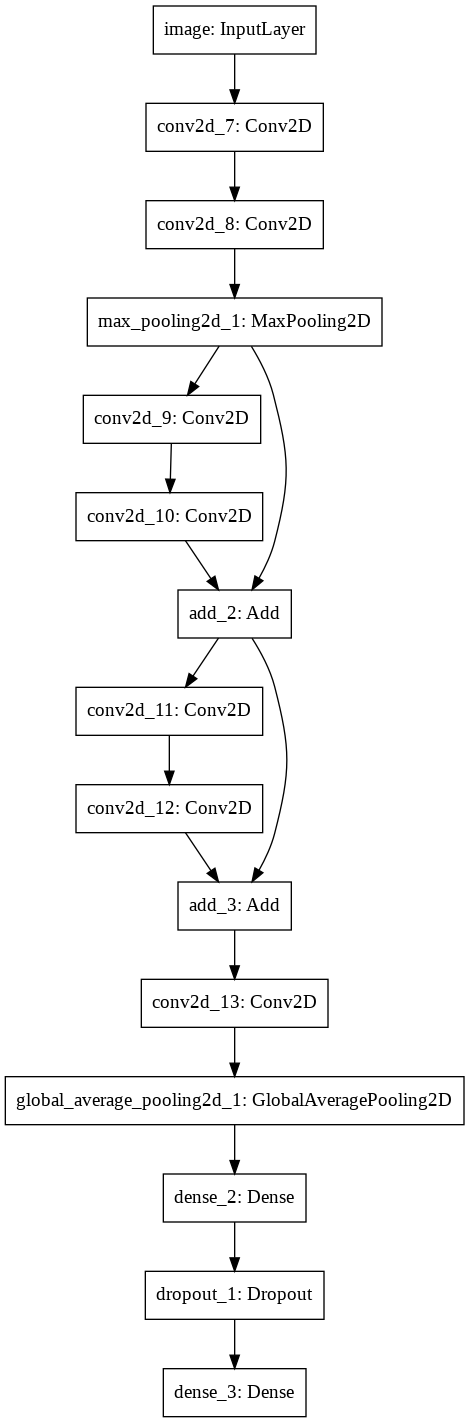

In [35]:
keras.utils.plot_model(resnet_model)

## Compile and Train Model

Compile model with required params

In [0]:
resnet_model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

Fit the model on dataset

In [40]:
# hist = resnet_model.fit(train_ds, epochs=10)
# for a smaller version of dataset, check this
hist = resnet_model.fit(x_train[:1000], y_train[:1000],
                 epochs=5, batch_size=32,
                 validation_split=0.2)

Epoch 1/5
25/25 [==============================] - 1s 32ms/step - loss: 1.3032 - acc: 0.5337 - val_loss: 1.2275 - val_acc: 0.5450
Epoch 2/5
25/25 [==============================] - 0s 18ms/step - loss: 1.1627 - acc: 0.5850 - val_loss: 1.1697 - val_acc: 0.5150
Epoch 3/5
25/25 [==============================] - 0s 17ms/step - loss: 1.1264 - acc: 0.5763 - val_loss: 1.1733 - val_acc: 0.5700
Epoch 4/5
25/25 [==============================] - 0s 17ms/step - loss: 1.0684 - acc: 0.6175 - val_loss: 1.1923 - val_acc: 0.5700
Epoch 5/5
25/25 [==============================] - 0s 16ms/step - loss: 1.0563 - acc: 0.6112 - val_loss: 1.2966 - val_acc: 0.5300


## Plot Results

In [0]:
def plot_hist(name):
  plt.plot(hist.history[f'{name}'], label=f'training {name}')
  plt.plot(hist.history[f'val_{name}'], label=f'validation {name}')
  plt.title(f'{name} Comparison')
  plt.xlabel('epochs')
  plt.ylabel(f'{name}')
  plt.legend()

Loss Plot

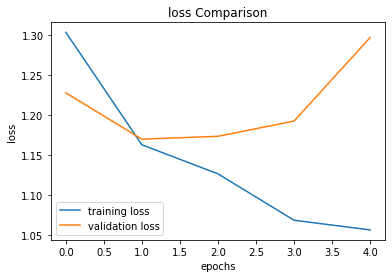

In [44]:
plot_hist('loss')

Accuracy Plot

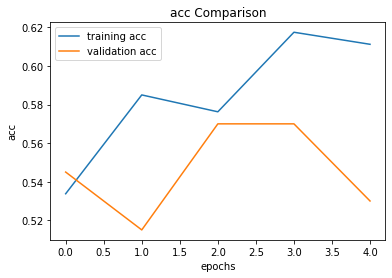

In [45]:
plot_hist('acc')